In [71]:
from models.autoencoder import AutoEncoder
from models.nnmodel import NNModel
from models.rfmodel import RFModel
from data_processor.data_processing import DataProcessing
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from data_processor.base_bars import BaseBars

In [142]:
features = pd.read_csv('/Users/andyliu/develop/andy/aapl_indicators_nosplit.csv')

In [143]:
features = features[~features.isin([np.nan, np.inf, -np.inf]).any(1)]

In [144]:
n = features.shape[0]
n_train = 4*n//5

In [145]:
features = features.drop('volume', axis=1)
features = features.drop('date', axis=1)
y = features['close']
x = features.drop('close', axis=1)

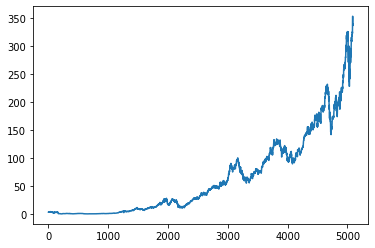

In [209]:
plt.plot(y)

In [146]:
x.shape

(5082, 17)

In [147]:
train = x.iloc[:n_train,:]
test = x.iloc[n_train:,:]

In [148]:
test.shape

(1017, 17)

In [149]:
a_train_y = y[:n_train]
train_y = a_train_y
a_test_y = y[n_train:]
test_y = a_test_y

In [156]:
a_train_x = train
a_test_x = test

In [168]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_a = scaler.fit_transform(a_train_x)
x_test_a = scaler.transform(a_test_x)

In [178]:
autoencoder = AutoEncoder(20, x_train_a.shape[1])
autoencoder.build_model(100, 50, 50, 100)

In [179]:
print('Training model...')
autoencoder.train_model(autoencoder.autoencoder, x_train_a, epochs=2, model_name='autoencoder')

Training model...
Epoch 1/2
4065/4065 [==============================] - 0s 106us/step - loss: 0.8478 - acc: 0.2905 - mae: 0.8215
Epoch 2/2
4065/4065 [==============================] - 0s 83us/step - loss: 0.5033 - acc: 0.5916 - mae: 0.6181


In [180]:
print('Testing model...')
autoencoder.test_model(autoencoder.autoencoder, x_test_a)

Testing model...
1017/1017 [==============================] - 0s 58us/step
[1.1019660373939058, 0.21337266266345978, 0.7940260767936707]


In [181]:
a_scaled_full = pd.DataFrame(scaler.transform(x))

In [182]:
autoencoder.encode_data(a_scaled_full, csv_path='./full_x.csv')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.492646,2.958069,1.137746,0.0,0.000000,2.438847,2.677989,2.103186,3.302395,1.269039,2.083853,2.826414,0.000000,0.000000,0.000000,0.000000,0.000000,2.200453,0.000000,1.990879
1,2.472605,2.994501,1.109086,0.0,0.000000,2.454583,2.650739,2.129288,3.270904,1.281731,2.095732,2.861724,0.000000,0.000000,0.000000,0.000000,0.000000,2.146709,0.000000,1.965587
2,2.442292,3.000043,1.108291,0.0,0.000000,2.475580,2.623383,2.133552,3.235841,1.286644,2.101886,2.908221,0.000000,0.000000,0.000000,0.000000,0.000000,2.085454,0.000000,1.967278
3,2.463549,2.713730,1.291198,0.0,0.000000,2.311821,2.656088,1.944201,3.273982,1.114952,2.059297,2.712342,0.000000,0.000000,0.000000,0.000000,0.000000,2.271630,0.000000,2.093709
4,2.442223,3.123441,1.015787,0.0,0.000000,2.546232,2.609844,2.237602,3.203843,1.352024,2.140540,3.002473,0.000000,0.000000,0.000000,0.000000,0.000000,2.000623,0.000000,1.911617
5,2.485206,3.226144,0.940069,0.0,0.000000,2.571119,2.639176,2.309983,3.237693,1.405384,2.149832,2.990127,0.000000,0.000000,0.000000,0.000000,0.000000,2.029556,0.000000,1.853089
6,2.477821,2.915255,1.143880,0.0,0.000000,2.406641,2.647930,2.099435,3.249565,1.220473,2.103153,2.814598,0.000000,0.000000,0.000000,0.000000,0.000000,2.176773,0.000000,1.991684
7,2.464312,2.958793,1.112100,0.0,0.000000,2.419224,2.625070,2.126505,3.230214,1.236107,2.114772,2.840823,0.000000,0.000000,0.000000,0.000000,0.000000,2.137687,0.000000,1.962121
8,2.472476,2.711339,1.273250,0.0,0.000000,2.274943,2.643002,1.955935,3.258741,1.086987,2.074336,2.673630,0.000000,0.000000,0.000000,0.000000,0.000000,2.288200,0.000000,2.069026
9,2.442937,2.829493,1.200741,0.0,0.000000,2.352941,2.609691,2.032521,3.220771,1.159947,2.093465,2.785109,0.000000,0.000000,0.000000,0.000000,0.000000,2.170536,0.000000,2.020324


In [183]:
preprocess = DataProcessing(0.8)

In [186]:
df1 = pd.read_csv("./full_x.csv", index_col=0)
df2 = pd.DataFrame(y)

In [187]:
df1.shape

(5082, 20)

In [188]:
train_x = df1.iloc[:n_train,:]
test_x = df1.iloc[n_train:, :]

In [189]:
'''fulldata, y_values, train_x, train_y, test_x, test_y =  preprocess.make_train_test(df_x=df1, df_y=df2, window=1, 
csv_path="sample_data/processed_data/rf_data", has_y=True, binary_y=True, save_csv=True)
y = pd.read_csv('sample_data/processed_data/rf_data/full_y.csv', index_col=0)
preprocess.check_labels(y)'''

'fulldata, y_values, train_x, train_y, test_x, test_y =  preprocess.make_train_test(df_x=df1, df_y=df2, window=1, \ncsv_path="sample_data/processed_data/rf_data", has_y=True, binary_y=True, save_csv=True)\ny = pd.read_csv(\'sample_data/processed_data/rf_data/full_y.csv\', index_col=0)\npreprocess.check_labels(y)'

In [190]:
'''train_x = pd.read_csv('sample_data/processed_data/rf_data/train_x.csv', index_col=0)
train_y = pd.read_csv('sample_data/processed_data/rf_data/train_y.csv', index_col=0)
test_x = pd.read_csv('sample_data/processed_data/rf_data/test_x.csv', index_col=0)
test_y = pd.read_csv('sample_data/processed_data/rf_data/test_y.csv', index_col=0)'''
train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.492646,2.958069,1.137746,0.0,0.0,2.438847,2.677989,2.103186,3.302395,1.269039,2.083853,2.826414,0.0,0.0,0.0,0.0,0.0,2.200453,0.0,1.990879
1,2.472605,2.994501,1.109086,0.0,0.0,2.454583,2.650739,2.129288,3.270904,1.281731,2.095732,2.861724,0.0,0.0,0.0,0.0,0.0,2.146709,0.0,1.965587
2,2.442292,3.000043,1.108291,0.0,0.0,2.475580,2.623383,2.133552,3.235841,1.286644,2.101886,2.908221,0.0,0.0,0.0,0.0,0.0,2.085454,0.0,1.967278
3,2.463549,2.713730,1.291198,0.0,0.0,2.311821,2.656088,1.944201,3.273982,1.114952,2.059297,2.712342,0.0,0.0,0.0,0.0,0.0,2.271630,0.0,2.093709
4,2.442223,3.123441,1.015787,0.0,0.0,2.546232,2.609844,2.237602,3.203843,1.352024,2.140540,3.002473,0.0,0.0,0.0,0.0,0.0,2.000623,0.0,1.911617


In [191]:
test_x.shape

(1017, 20)

In [246]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train = scaler.fit_transform(train_x)
x_test = scaler.fit_transform(test_x)

In [212]:
pd.DataFrame(x_test).max(axis=0)

0      0.487418
1     -0.899917
2     -0.370393
3      1.333089
4      4.952331
5     -0.156337
6     -0.320440
7     -0.285779
8     -0.789751
9      2.024323
10    -1.000000
11     2.281710
12    26.758113
13    28.616265
14     4.453939
15     6.046303
16     4.987740
17    -0.225756
18    29.892084
19    -0.213258
dtype: float64

In [193]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.805376,0.636024,0.004910,-1.0,-1.0,0.757505,0.855576,0.679589,0.820660,0.629849,0.897875,0.861694,-1.0,-1.0,-1.0,-1.0,-1.0,0.524772,-1.0,0.400528
1,0.790861,0.656173,-0.020403,-1.0,-1.0,0.768845,0.836695,0.700434,0.803299,0.646151,0.908693,0.884952,-1.0,-1.0,-1.0,-1.0,-1.0,0.487531,-1.0,0.382736
2,0.768906,0.659238,-0.021105,-1.0,-1.0,0.783976,0.817739,0.703839,0.783968,0.652460,0.914298,0.915579,-1.0,-1.0,-1.0,-1.0,-1.0,0.445085,-1.0,0.383926
3,0.784302,0.500887,0.140446,-1.0,-1.0,0.665966,0.840401,0.552625,0.804995,0.431954,0.875510,0.786557,-1.0,-1.0,-1.0,-1.0,-1.0,0.574093,-1.0,0.472866
4,0.768856,0.727486,-0.102809,-1.0,-1.0,0.834890,0.808358,0.786933,0.766327,0.736429,0.949503,0.977660,-1.0,-1.0,-1.0,-1.0,-1.0,0.386302,-1.0,0.344769


In [194]:
#nnmodel = NNModel(x_train.shape[1])
#nnmodel.make_model()

#print('Training model...')
#nnmodel.train_model(x_train, train_y, model_name='nnmodel', epochs=1000)

In [195]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

In [196]:
len(x_train)

4065

In [249]:
X_train= np.reshape(x_train, (len(x_train), 1, x_train.shape[1]))
X_test=np.reshape(x_test, (len(x_test), 1, x_test.shape[1]))

In [250]:
X_test.shape

(1017, 1, 20)

In [199]:
from keras.models import load_model
from keras import regularizers
from keras.optimizers import Adam

In [200]:
model = load_model('./models/attempt1.h5')

In [258]:
neurons=60
dropout=0.20
model = Sequential()
model.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='sigmoid'))
model.add(Dropout(dropout))
model.add(LSTM(neurons*2, return_sequences=True, activation='sigmoid'))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation='sigmoid'))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 1, 60)             19440     
_________________________________________________________________
dropout_15 (Dropout)         (None, 1, 60)             0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 1, 120)            86880     
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 120)            0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 60)                43440     
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 61        
_________________________________________________________________
activation_8 (Activation)    (None, 1)               

In [232]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [233]:
print(train_y.shape, test_y.shape)
print(X_train.shape, X_test.shape)
train_y = np.array(scaler.fit_transform(np.array(train_y).reshape(-1,1)))
test_y = np.array(scaler.fit_transform(np.array(test_y).reshape(-1,1)))

(4065, 1) (1017, 1)
(4065, 1, 20) (1017, 1, 20)


In [235]:
test_y

array([[0.05777795],
       [0.05933848],
       [0.05743539],
       ...,
       [1.        ],
       [0.93617402],
       [0.94587599]])

Epoch 1/5000
4065/4065 [==============================] - 4s 874us/step - loss: 0.0789
Epoch 2/5000
4065/4065 [==============================] - 1s 317us/step - loss: 0.0190
Epoch 3/5000
4065/4065 [==============================] - 1s 320us/step - loss: 0.0066
Epoch 4/5000
4065/4065 [==============================] - 1s 308us/step - loss: 0.0052
Epoch 5/5000
4065/4065 [==============================] - 1s 335us/step - loss: 0.0040
Epoch 6/5000
4065/4065 [==============================] - 1s 312us/step - loss: 0.0031
Epoch 7/5000
4065/4065 [==============================] - 1s 316us/step - loss: 0.0026
Epoch 8/5000
4065/4065 [==============================] - 1s 317us/step - loss: 0.0020
Epoch 9/5000
4065/4065 [==============================] - 1s 322us/step - loss: 0.0017
Epoch 10/5000
4065/4065 [==============================] - 1s 309us/step - loss: 0.0016
Epoch 11/5000
4065/4065 [==============================] - 1s 301us/step - loss: 0.0014
Epoch 12/5000
4065/4065 [================

4065/4065 [==============================] - 1s 334us/step - loss: 3.0345e-04
Epoch 91/5000
4065/4065 [==============================] - 1s 321us/step - loss: 2.6893e-04
Epoch 92/5000
4065/4065 [==============================] - 1s 328us/step - loss: 2.9668e-04
Epoch 93/5000
4065/4065 [==============================] - 1s 307us/step - loss: 2.9530e-04
Epoch 94/5000
4065/4065 [==============================] - 1s 279us/step - loss: 2.8770e-04
Epoch 95/5000
4065/4065 [==============================] - 1s 306us/step - loss: 2.6955e-04
Epoch 96/5000
4065/4065 [==============================] - 1s 318us/step - loss: 3.0586e-04
Epoch 97/5000
4065/4065 [==============================] - 1s 287us/step - loss: 2.8719e-04
Epoch 98/5000
4065/4065 [==============================] - 1s 296us/step - loss: 2.8204e-04
Epoch 99/5000
4065/4065 [==============================] - 1s 340us/step - loss: 2.8160e-04
Epoch 100/5000
4065/4065 [==============================] - 1s 287us/step - loss: 2.8557e-04
E

4065/4065 [==============================] - 1s 322us/step - loss: 1.8979e-04
Epoch 179/5000
4065/4065 [==============================] - 1s 313us/step - loss: 1.8221e-04
Epoch 180/5000
4065/4065 [==============================] - 1s 334us/step - loss: 1.8543e-04
Epoch 181/5000
4065/4065 [==============================] - 1s 293us/step - loss: 1.8529e-04
Epoch 182/5000
4065/4065 [==============================] - 1s 298us/step - loss: 1.9876e-04
Epoch 183/5000
4065/4065 [==============================] - 1s 319us/step - loss: 1.7757e-04
Epoch 184/5000
4065/4065 [==============================] - 1s 361us/step - loss: 1.7390e-04
Epoch 185/5000
4065/4065 [==============================] - 1s 313us/step - loss: 1.7578e-04
Epoch 186/5000
4065/4065 [==============================] - 1s 332us/step - loss: 1.9544e-04
Epoch 187/5000
4065/4065 [==============================] - 1s 326us/step - loss: 1.7514e-04
Epoch 188/5000
4065/4065 [==============================] - 1s 312us/step - loss: 2.0

4065/4065 [==============================] - 1s 337us/step - loss: 1.4270e-04
Epoch 267/5000
4065/4065 [==============================] - 1s 349us/step - loss: 1.3883e-04
Epoch 268/5000
4065/4065 [==============================] - 1s 330us/step - loss: 1.4455e-04
Epoch 269/5000
4065/4065 [==============================] - 1s 332us/step - loss: 1.4582e-04
Epoch 270/5000
4065/4065 [==============================] - 1s 345us/step - loss: 1.3709e-04
Epoch 271/5000
4065/4065 [==============================] - 1s 358us/step - loss: 1.4960e-04
Epoch 272/5000
4065/4065 [==============================] - 1s 327us/step - loss: 1.3581e-04
Epoch 273/5000
4065/4065 [==============================] - 1s 365us/step - loss: 1.4458e-04
Epoch 274/5000
4065/4065 [==============================] - 1s 359us/step - loss: 1.3938e-04
Epoch 275/5000
4065/4065 [==============================] - 2s 373us/step - loss: 1.4090e-04
Epoch 276/5000
4065/4065 [==============================] - 1s 352us/step - loss: 1.5

Epoch 354/5000
4065/4065 [==============================] - 1s 244us/step - loss: 1.2219e-04
Epoch 355/5000
4065/4065 [==============================] - 1s 317us/step - loss: 1.1544e-04
Epoch 356/5000
4065/4065 [==============================] - 1s 341us/step - loss: 1.3675e-04
Epoch 357/5000
4065/4065 [==============================] - 1s 301us/step - loss: 1.3220e-04
Epoch 358/5000
4065/4065 [==============================] - 1s 336us/step - loss: 1.2235e-04
Epoch 359/5000
4065/4065 [==============================] - 1s 329us/step - loss: 1.1867e-04
Epoch 360/5000
4065/4065 [==============================] - 1s 321us/step - loss: 1.2429e-04
Epoch 361/5000
4065/4065 [==============================] - 1s 336us/step - loss: 1.2715e-04
Epoch 362/5000
4065/4065 [==============================] - 1s 305us/step - loss: 1.1392e-04
Epoch 363/5000
4065/4065 [==============================] - 1s 294us/step - loss: 1.1704e-04
Epoch 364/5000
4065/4065 [==============================] - 1s 339us/s

4065/4065 [==============================] - 1s 320us/step - loss: 1.0145e-04
Epoch 443/5000
4065/4065 [==============================] - 1s 302us/step - loss: 1.0958e-04
Epoch 444/5000
4065/4065 [==============================] - 1s 295us/step - loss: 1.0075e-04
Epoch 445/5000
4065/4065 [==============================] - 1s 306us/step - loss: 1.0179e-04
Epoch 446/5000
4065/4065 [==============================] - 1s 301us/step - loss: 1.0653e-04
Epoch 447/5000
4065/4065 [==============================] - 1s 299us/step - loss: 1.0677e-04
Epoch 448/5000
4065/4065 [==============================] - 1s 297us/step - loss: 1.0466e-04
Epoch 449/5000
4065/4065 [==============================] - 1s 304us/step - loss: 9.9271e-05
Epoch 450/5000
4065/4065 [==============================] - 1s 311us/step - loss: 1.0720e-04
Epoch 451/5000
4065/4065 [==============================] - 1s 332us/step - loss: 1.0549e-04
Epoch 452/5000
4065/4065 [==============================] - 1s 291us/step - loss: 1.0

Epoch 530/5000
4065/4065 [==============================] - 1s 316us/step - loss: 9.5199e-05
Epoch 531/5000
4065/4065 [==============================] - 1s 290us/step - loss: 9.9677e-05
Epoch 532/5000
4065/4065 [==============================] - 1s 313us/step - loss: 9.4077e-05
Epoch 533/5000
4065/4065 [==============================] - 1s 306us/step - loss: 9.7424e-05
Epoch 534/5000
4065/4065 [==============================] - 1s 317us/step - loss: 9.7978e-05
Epoch 535/5000
4065/4065 [==============================] - 1s 325us/step - loss: 9.5051e-05
Epoch 536/5000
4065/4065 [==============================] - 1s 338us/step - loss: 9.9134e-05
Epoch 537/5000
4065/4065 [==============================] - 1s 356us/step - loss: 9.3063e-05
Epoch 538/5000
4065/4065 [==============================] - 1s 322us/step - loss: 9.0191e-05
Epoch 539/5000
4065/4065 [==============================] - 1s 298us/step - loss: 9.4681e-05
Epoch 540/5000
4065/4065 [==============================] - 1s 326us/s

4065/4065 [==============================] - 1s 314us/step - loss: 8.8719e-05
Epoch 619/5000
4065/4065 [==============================] - 1s 349us/step - loss: 9.1554e-05
Epoch 620/5000
4065/4065 [==============================] - 1s 314us/step - loss: 8.5881e-05
Epoch 621/5000
4065/4065 [==============================] - 1s 341us/step - loss: 7.9502e-05
Epoch 622/5000
4065/4065 [==============================] - 1s 319us/step - loss: 8.5584e-05
Epoch 623/5000
4065/4065 [==============================] - 1s 299us/step - loss: 9.7481e-05
Epoch 624/5000
4065/4065 [==============================] - 1s 309us/step - loss: 9.2058e-05
Epoch 625/5000
4065/4065 [==============================] - 1s 322us/step - loss: 8.7863e-05
Epoch 626/5000
4065/4065 [==============================] - 1s 290us/step - loss: 8.6524e-05
Epoch 627/5000
4065/4065 [==============================] - 1s 320us/step - loss: 8.9469e-05
Epoch 628/5000
4065/4065 [==============================] - 1s 321us/step - loss: 1.0

Epoch 706/5000
4065/4065 [==============================] - 1s 303us/step - loss: 8.1813e-05
Epoch 707/5000
4065/4065 [==============================] - 1s 289us/step - loss: 8.2552e-05
Epoch 708/5000
4065/4065 [==============================] - 1s 305us/step - loss: 9.1021e-05
Epoch 709/5000
4065/4065 [==============================] - 1s 340us/step - loss: 7.9928e-05
Epoch 710/5000
4065/4065 [==============================] - 1s 292us/step - loss: 7.8442e-05
Epoch 711/5000
4065/4065 [==============================] - 1s 340us/step - loss: 8.2902e-05
Epoch 712/5000
4065/4065 [==============================] - 1s 317us/step - loss: 7.9126e-05
Epoch 713/5000
4065/4065 [==============================] - 1s 347us/step - loss: 8.0176e-05
Epoch 714/5000
4065/4065 [==============================] - 1s 342us/step - loss: 8.3226e-05
Epoch 715/5000
4065/4065 [==============================] - 1s 326us/step - loss: 8.3132e-05
Epoch 716/5000
4065/4065 [==============================] - 1s 328us/s

Epoch 794/5000
4065/4065 [==============================] - 1s 302us/step - loss: 7.9075e-05
Epoch 795/5000
4065/4065 [==============================] - 1s 301us/step - loss: 8.2061e-05
Epoch 796/5000
4065/4065 [==============================] - 1s 317us/step - loss: 7.3799e-05
Epoch 797/5000
4065/4065 [==============================] - 1s 298us/step - loss: 7.9129e-05
Epoch 798/5000
4065/4065 [==============================] - 1s 328us/step - loss: 7.6860e-05
Epoch 799/5000
4065/4065 [==============================] - 1s 326us/step - loss: 8.0738e-05
Epoch 800/5000
4065/4065 [==============================] - 1s 315us/step - loss: 7.6248e-05
Epoch 801/5000
4065/4065 [==============================] - 1s 307us/step - loss: 7.7969e-05
Epoch 802/5000
4065/4065 [==============================] - 1s 303us/step - loss: 7.9119e-05
Epoch 803/5000
4065/4065 [==============================] - 1s 333us/step - loss: 7.5479e-05
Epoch 804/5000
4065/4065 [==============================] - 1s 308us/s

4065/4065 [==============================] - 1s 150us/step - loss: 7.1991e-05
Epoch 882/5000
4065/4065 [==============================] - 1s 146us/step - loss: 7.6095e-05
Epoch 883/5000
4065/4065 [==============================] - 1s 146us/step - loss: 7.3841e-05
Epoch 884/5000
4065/4065 [==============================] - 1s 144us/step - loss: 7.3848e-05
Epoch 885/5000
4065/4065 [==============================] - 1s 148us/step - loss: 7.4477e-05
Epoch 886/5000
4065/4065 [==============================] - 1s 145us/step - loss: 7.3580e-05
Epoch 887/5000
4065/4065 [==============================] - 1s 146us/step - loss: 7.4558e-05
Epoch 888/5000
4065/4065 [==============================] - 1s 160us/step - loss: 8.1907e-05
Epoch 889/5000
4065/4065 [==============================] - 1s 147us/step - loss: 7.2202e-05
Epoch 890/5000
4065/4065 [==============================] - 1s 147us/step - loss: 6.8704e-05
Epoch 891/5000
4065/4065 [==============================] - 1s 145us/step - loss: 7.4

4065/4065 [==============================] - 1s 142us/step - loss: 7.1367e-05
Epoch 970/5000
4065/4065 [==============================] - 1s 144us/step - loss: 6.9690e-05
Epoch 971/5000
4065/4065 [==============================] - 1s 144us/step - loss: 6.9270e-05
Epoch 972/5000
4065/4065 [==============================] - 1s 143us/step - loss: 6.8958e-05
Epoch 973/5000
4065/4065 [==============================] - 1s 145us/step - loss: 6.8758e-05
Epoch 974/5000
4065/4065 [==============================] - 1s 144us/step - loss: 6.8370e-05
Epoch 975/5000
4065/4065 [==============================] - 1s 145us/step - loss: 7.2705e-05
Epoch 976/5000
4065/4065 [==============================] - 1s 143us/step - loss: 7.2499e-05
Epoch 977/5000
4065/4065 [==============================] - 1s 142us/step - loss: 7.3467e-05
Epoch 978/5000
4065/4065 [==============================] - 1s 143us/step - loss: 8.4407e-05
Epoch 979/5000
4065/4065 [==============================] - 1s 144us/step - loss: 7.1

4065/4065 [==============================] - 1s 154us/step - loss: 7.0968e-05
Epoch 1057/5000
4065/4065 [==============================] - 1s 152us/step - loss: 7.2871e-05
Epoch 1058/5000
4065/4065 [==============================] - 1s 144us/step - loss: 6.7326e-05
Epoch 1059/5000
4065/4065 [==============================] - 1s 147us/step - loss: 7.4272e-05
Epoch 1060/5000
4065/4065 [==============================] - 1s 147us/step - loss: 6.9635e-05
Epoch 1061/5000
4065/4065 [==============================] - 1s 142us/step - loss: 6.8292e-05
Epoch 1062/5000
4065/4065 [==============================] - 1s 142us/step - loss: 6.7137e-05
Epoch 1063/5000
4065/4065 [==============================] - 1s 143us/step - loss: 6.9137e-05
Epoch 1064/5000
4065/4065 [==============================] - 1s 142us/step - loss: 6.6358e-05
Epoch 1065/5000
4065/4065 [==============================] - 1s 142us/step - loss: 7.0624e-05
Epoch 1066/5000
4065/4065 [==============================] - 1s 144us/step -

4065/4065 [==============================] - 1s 162us/step - loss: 6.5947e-05
Epoch 1144/5000
4065/4065 [==============================] - 1s 161us/step - loss: 6.6350e-05
Epoch 1145/5000
4065/4065 [==============================] - 1s 163us/step - loss: 6.7137e-05
Epoch 1146/5000
4065/4065 [==============================] - 1s 160us/step - loss: 5.9807e-05
Epoch 1147/5000
4065/4065 [==============================] - 1s 158us/step - loss: 7.1994e-05
Epoch 1148/5000
4065/4065 [==============================] - 1s 143us/step - loss: 6.6518e-05
Epoch 1149/5000
4065/4065 [==============================] - 1s 142us/step - loss: 7.0043e-05
Epoch 1150/5000
4065/4065 [==============================] - 1s 142us/step - loss: 6.6125e-05
Epoch 1151/5000
4065/4065 [==============================] - 1s 142us/step - loss: 6.6345e-05
Epoch 1152/5000
4065/4065 [==============================] - 1s 150us/step - loss: 6.4619e-05
Epoch 1153/5000
4065/4065 [==============================] - 1s 142us/step -

4065/4065 [==============================] - 1s 147us/step - loss: 6.0506e-05
Epoch 1231/5000
4065/4065 [==============================] - 1s 154us/step - loss: 6.6999e-05
Epoch 1232/5000
4065/4065 [==============================] - 1s 143us/step - loss: 6.2427e-05
Epoch 1233/5000
4065/4065 [==============================] - ETA: 0s - loss: 6.6945e-0 - 1s 142us/step - loss: 6.6307e-05
Epoch 1234/5000
4065/4065 [==============================] - 1s 143us/step - loss: 6.4351e-05
Epoch 1235/5000
4065/4065 [==============================] - 1s 147us/step - loss: 6.3745e-05
Epoch 1236/5000
4065/4065 [==============================] - 1s 144us/step - loss: 6.9073e-05
Epoch 1237/5000
4065/4065 [==============================] - 1s 144us/step - loss: 6.2778e-05
Epoch 1238/5000
4065/4065 [==============================] - 1s 142us/step - loss: 6.0687e-05
Epoch 1239/5000
4065/4065 [==============================] - 1s 143us/step - loss: 6.1646e-05
Epoch 1240/5000
4065/4065 [=====================

4065/4065 [==============================] - 1s 144us/step - loss: 6.2060e-05
Epoch 1318/5000
4065/4065 [==============================] - 1s 143us/step - loss: 6.3129e-05
Epoch 1319/5000
4065/4065 [==============================] - 1s 152us/step - loss: 6.2146e-05
Epoch 1320/5000
4065/4065 [==============================] - 1s 142us/step - loss: 6.4341e-05
Epoch 1321/5000
4065/4065 [==============================] - 1s 145us/step - loss: 6.4985e-05
Epoch 1322/5000
4065/4065 [==============================] - 1s 142us/step - loss: 6.0414e-05
Epoch 1323/5000
4065/4065 [==============================] - 1s 145us/step - loss: 6.1272e-05
Epoch 1324/5000
4065/4065 [==============================] - 1s 145us/step - loss: 6.2055e-05
Epoch 1325/5000
4065/4065 [==============================] - 1s 143us/step - loss: 5.7719e-05
Epoch 1326/5000
4065/4065 [==============================] - 1s 143us/step - loss: 6.3082e-05
Epoch 1327/5000
4065/4065 [==============================] - 1s 144us/step -

4065/4065 [==============================] - 1s 142us/step - loss: 6.2120e-05
Epoch 1405/5000
4065/4065 [==============================] - 1s 144us/step - loss: 6.0425e-05
Epoch 1406/5000
4065/4065 [==============================] - 1s 150us/step - loss: 6.1133e-05
Epoch 1407/5000
4065/4065 [==============================] - 1s 141us/step - loss: 6.0620e-05
Epoch 1408/5000
4065/4065 [==============================] - 1s 140us/step - loss: 6.2161e-05
Epoch 1409/5000
4065/4065 [==============================] - 1s 142us/step - loss: 6.1140e-05
Epoch 1410/5000
4065/4065 [==============================] - 1s 141us/step - loss: 6.1846e-05
Epoch 1411/5000
4065/4065 [==============================] - 1s 142us/step - loss: 6.2176e-05
Epoch 1412/5000
4065/4065 [==============================] - 1s 144us/step - loss: 5.9331e-05
Epoch 1413/5000
4065/4065 [==============================] - 1s 144us/step - loss: 6.4679e-05
Epoch 1414/5000
4065/4065 [==============================] - 1s 143us/step -

4065/4065 [==============================] - 1s 144us/step - loss: 5.8000e-05
Epoch 1492/5000
4065/4065 [==============================] - 1s 144us/step - loss: 5.7588e-05
Epoch 1493/5000
4065/4065 [==============================] - 1s 143us/step - loss: 5.8618e-05
Epoch 1494/5000
4065/4065 [==============================] - 1s 143us/step - loss: 5.8714e-05
Epoch 1495/5000
4065/4065 [==============================] - 1s 146us/step - loss: 6.4113e-05
Epoch 1496/5000
4065/4065 [==============================] - 1s 153us/step - loss: 5.3922e-05
Epoch 1497/5000
4065/4065 [==============================] - 1s 145us/step - loss: 5.9692e-05
Epoch 1498/5000
4065/4065 [==============================] - 1s 143us/step - loss: 6.0490e-05
Epoch 1499/5000
4065/4065 [==============================] - 1s 147us/step - loss: 5.8058e-05
Epoch 1500/5000
4065/4065 [==============================] - 1s 146us/step - loss: 6.0277e-05
Epoch 1501/5000
4065/4065 [==============================] - 1s 143us/step -

4065/4065 [==============================] - 1s 154us/step - loss: 5.7912e-05
Epoch 1579/5000
4065/4065 [==============================] - 1s 143us/step - loss: 6.2163e-05
Epoch 1580/5000
4065/4065 [==============================] - 1s 143us/step - loss: 5.5580e-05
Epoch 1581/5000
4065/4065 [==============================] - 1s 142us/step - loss: 5.6464e-05
Epoch 1582/5000
4065/4065 [==============================] - 1s 145us/step - loss: 6.5659e-05
Epoch 1583/5000
4065/4065 [==============================] - 1s 143us/step - loss: 5.6549e-05
Epoch 1584/5000
4065/4065 [==============================] - 1s 143us/step - loss: 5.6940e-05
Epoch 1585/5000
4065/4065 [==============================] - 1s 144us/step - loss: 5.7091e-05
Epoch 1586/5000
4065/4065 [==============================] - 1s 144us/step - loss: 5.8275e-05
Epoch 1587/5000
4065/4065 [==============================] - 1s 149us/step - loss: 5.4686e-05
Epoch 1588/5000
4065/4065 [==============================] - 1s 145us/step -

4065/4065 [==============================] - 1s 146us/step - loss: 5.7635e-05
Epoch 1666/5000
4065/4065 [==============================] - 1s 142us/step - loss: 5.5893e-05
Epoch 1667/5000
4065/4065 [==============================] - 1s 148us/step - loss: 5.5134e-05
Epoch 1668/5000
4065/4065 [==============================] - 1s 145us/step - loss: 5.4536e-05
Epoch 1669/5000
4065/4065 [==============================] - 1s 143us/step - loss: 5.7057e-05
Epoch 1670/5000
4065/4065 [==============================] - 1s 144us/step - loss: 5.4569e-05
Epoch 1671/5000
4065/4065 [==============================] - 1s 142us/step - loss: 5.8817e-05
Epoch 1672/5000
4065/4065 [==============================] - 1s 144us/step - loss: 5.1284e-05
Epoch 1673/5000
4065/4065 [==============================] - 1s 142us/step - loss: 5.5007e-05
Epoch 1674/5000
4065/4065 [==============================] - 1s 142us/step - loss: 5.2738e-05
Epoch 1675/5000
4065/4065 [==============================] - 1s 144us/step -

4065/4065 [==============================] - 1s 147us/step - loss: 5.2530e-05
Epoch 1753/5000
4065/4065 [==============================] - 1s 144us/step - loss: 5.6286e-05
Epoch 1754/5000
4065/4065 [==============================] - 1s 143us/step - loss: 5.8565e-05
Epoch 1755/5000
4065/4065 [==============================] - 1s 144us/step - loss: 5.4461e-05
Epoch 1756/5000
4065/4065 [==============================] - 1s 145us/step - loss: 5.4509e-05
Epoch 1757/5000
4065/4065 [==============================] - 1s 158us/step - loss: 5.7030e-05
Epoch 1758/5000
4065/4065 [==============================] - 1s 142us/step - loss: 5.4250e-05
Epoch 1759/5000
4065/4065 [==============================] - 1s 144us/step - loss: 5.7290e-05
Epoch 1760/5000
4065/4065 [==============================] - 1s 144us/step - loss: 5.2433e-05
Epoch 1761/5000
4065/4065 [==============================] - 1s 150us/step - loss: 5.1593e-05
Epoch 1762/5000
4065/4065 [==============================] - 1s 144us/step -

4065/4065 [==============================] - 1s 142us/step - loss: 5.2896e-05
Epoch 1840/5000
4065/4065 [==============================] - 1s 144us/step - loss: 4.9604e-05
Epoch 1841/5000
4065/4065 [==============================] - 1s 147us/step - loss: 5.1878e-05
Epoch 1842/5000
4065/4065 [==============================] - 1s 142us/step - loss: 5.5135e-05
Epoch 1843/5000
4065/4065 [==============================] - 1s 145us/step - loss: 5.0523e-05
Epoch 1844/5000
4065/4065 [==============================] - 1s 143us/step - loss: 4.9942e-05
Epoch 1845/5000
4065/4065 [==============================] - 1s 143us/step - loss: 5.1131e-05
Epoch 1846/5000
4065/4065 [==============================] - 1s 143us/step - loss: 5.6137e-05
Epoch 1847/5000
4065/4065 [==============================] - 1s 148us/step - loss: 5.7363e-05
Epoch 1848/5000
4065/4065 [==============================] - 1s 153us/step - loss: 5.1529e-05
Epoch 1849/5000
4065/4065 [==============================] - 1s 143us/step -

4065/4065 [==============================] - 1s 217us/step - loss: 4.9788e-05
Epoch 1927/5000
4065/4065 [==============================] - 1s 162us/step - loss: 5.0184e-05
Epoch 1928/5000
4065/4065 [==============================] - 1s 175us/step - loss: 5.1461e-05
Epoch 1929/5000
4065/4065 [==============================] - 1s 187us/step - loss: 5.0784e-05
Epoch 1930/5000
4065/4065 [==============================] - 1s 177us/step - loss: 5.2079e-05
Epoch 1931/5000
4065/4065 [==============================] - 1s 168us/step - loss: 5.3075e-05
Epoch 1932/5000
4065/4065 [==============================] - 1s 186us/step - loss: 5.0712e-05
Epoch 1933/5000
4065/4065 [==============================] - 1s 194us/step - loss: 5.0248e-05
Epoch 1934/5000
4065/4065 [==============================] - 1s 166us/step - loss: 5.2078e-05
Epoch 1935/5000
4065/4065 [==============================] - 1s 196us/step - loss: 5.1310e-05 0s - los
Epoch 1936/5000
4065/4065 [==============================] - 1s 182

4065/4065 [==============================] - 1s 160us/step - loss: 4.6744e-05
Epoch 2014/5000
4065/4065 [==============================] - 1s 158us/step - loss: 5.4215e-05
Epoch 2015/5000
4065/4065 [==============================] - 1s 156us/step - loss: 4.9776e-05
Epoch 2016/5000
4065/4065 [==============================] - 1s 161us/step - loss: 5.0817e-05
Epoch 2017/5000
4065/4065 [==============================] - 1s 156us/step - loss: 4.8965e-05
Epoch 2018/5000
4065/4065 [==============================] - 1s 157us/step - loss: 5.0496e-05
Epoch 2019/5000
4065/4065 [==============================] - 1s 157us/step - loss: 5.3394e-05
Epoch 2020/5000
4065/4065 [==============================] - 1s 159us/step - loss: 5.3640e-05
Epoch 2021/5000
4065/4065 [==============================] - 1s 157us/step - loss: 4.9834e-05
Epoch 2022/5000
4065/4065 [==============================] - 1s 154us/step - loss: 5.2450e-05
Epoch 2023/5000
4065/4065 [==============================] - 1s 157us/step -

4065/4065 [==============================] - 1s 322us/step - loss: 4.7865e-05
Epoch 2101/5000
4065/4065 [==============================] - 1s 336us/step - loss: 4.6984e-05
Epoch 2102/5000
4065/4065 [==============================] - 1s 319us/step - loss: 5.3379e-05
Epoch 2103/5000
4065/4065 [==============================] - 1s 304us/step - loss: 4.6227e-05
Epoch 2104/5000
4065/4065 [==============================] - 1s 295us/step - loss: 5.0707e-05
Epoch 2105/5000
4065/4065 [==============================] - 1s 306us/step - loss: 4.8509e-05
Epoch 2106/5000
4065/4065 [==============================] - 1s 312us/step - loss: 5.2128e-05
Epoch 2107/5000
4065/4065 [==============================] - 1s 306us/step - loss: 4.6611e-05
Epoch 2108/5000
4065/4065 [==============================] - 1s 327us/step - loss: 4.7125e-05
Epoch 2109/5000
4065/4065 [==============================] - 1s 296us/step - loss: 4.8966e-05
Epoch 2110/5000
4065/4065 [==============================] - 1s 323us/step -

4065/4065 [==============================] - 1s 189us/step - loss: 4.5900e-05
Epoch 2188/5000
4065/4065 [==============================] - 1s 176us/step - loss: 4.6357e-05
Epoch 2189/5000
4065/4065 [==============================] - 1s 184us/step - loss: 4.8034e-05
Epoch 2190/5000
4065/4065 [==============================] - 1s 200us/step - loss: 4.6652e-05
Epoch 2191/5000
4065/4065 [==============================] - 1s 181us/step - loss: 5.3589e-05
Epoch 2192/5000
4065/4065 [==============================] - 1s 153us/step - loss: 4.9358e-05
Epoch 2193/5000
4065/4065 [==============================] - 1s 154us/step - loss: 4.7683e-05
Epoch 2194/5000
4065/4065 [==============================] - 1s 168us/step - loss: 4.8884e-05
Epoch 2195/5000
4065/4065 [==============================] - 1s 281us/step - loss: 4.7708e-05
Epoch 2196/5000
4065/4065 [==============================] - 1s 275us/step - loss: 4.7974e-05
Epoch 2197/5000
4065/4065 [==============================] - 1s 154us/step -

4065/4065 [==============================] - 1s 149us/step - loss: 4.3809e-05
Epoch 2275/5000
4065/4065 [==============================] - 1s 156us/step - loss: 4.2807e-05
Epoch 2276/5000
4065/4065 [==============================] - 1s 188us/step - loss: 4.7692e-05
Epoch 2277/5000
4065/4065 [==============================] - 1s 168us/step - loss: 4.5686e-05
Epoch 2278/5000
4065/4065 [==============================] - 1s 222us/step - loss: 4.5472e-05
Epoch 2279/5000
4065/4065 [==============================] - 1s 215us/step - loss: 4.7102e-05
Epoch 2280/5000
4065/4065 [==============================] - 1s 179us/step - loss: 4.5145e-05
Epoch 2281/5000
4065/4065 [==============================] - 1s 181us/step - loss: 4.2555e-05
Epoch 2282/5000
4065/4065 [==============================] - 1s 156us/step - loss: 4.8441e-05
Epoch 2283/5000
4065/4065 [==============================] - 1s 247us/step - loss: 4.3030e-05
Epoch 2284/5000
4065/4065 [==============================] - 1s 172us/step -

4065/4065 [==============================] - 1s 183us/step - loss: 4.3864e-05
Epoch 2362/5000
4065/4065 [==============================] - 1s 163us/step - loss: 4.4815e-05
Epoch 2363/5000
4065/4065 [==============================] - 1s 196us/step - loss: 4.4226e-05
Epoch 2364/5000
4065/4065 [==============================] - 1s 174us/step - loss: 4.9673e-05
Epoch 2365/5000
4065/4065 [==============================] - 1s 161us/step - loss: 4.5521e-05
Epoch 2366/5000
4065/4065 [==============================] - 1s 162us/step - loss: 4.6065e-05
Epoch 2367/5000
4065/4065 [==============================] - 1s 158us/step - loss: 4.4390e-05
Epoch 2368/5000
4065/4065 [==============================] - 1s 168us/step - loss: 4.3649e-05
Epoch 2369/5000
4065/4065 [==============================] - 1s 185us/step - loss: 4.4900e-05
Epoch 2370/5000
4065/4065 [==============================] - 1s 155us/step - loss: 4.5611e-05
Epoch 2371/5000
4065/4065 [==============================] - 1s 196us/step -

4065/4065 [==============================] - 1s 192us/step - loss: 4.1456e-05
Epoch 2449/5000
4065/4065 [==============================] - 1s 151us/step - loss: 4.6051e-05
Epoch 2450/5000
4065/4065 [==============================] - 1s 148us/step - loss: 4.5235e-05
Epoch 2451/5000
4065/4065 [==============================] - 1s 180us/step - loss: 4.5905e-05
Epoch 2452/5000
4065/4065 [==============================] - 1s 220us/step - loss: 4.4031e-05
Epoch 2453/5000
4065/4065 [==============================] - 1s 244us/step - loss: 4.4182e-05
Epoch 2454/5000
4065/4065 [==============================] - 1s 196us/step - loss: 4.3072e-05
Epoch 2455/5000
4065/4065 [==============================] - 1s 184us/step - loss: 4.3854e-05
Epoch 2456/5000
4065/4065 [==============================] - 1s 172us/step - loss: 4.4266e-05
Epoch 2457/5000
4065/4065 [==============================] - 1s 179us/step - loss: 4.4497e-05
Epoch 2458/5000
4065/4065 [==============================] - 1s 187us/step -

4065/4065 [==============================] - 1s 167us/step - loss: 4.4007e-05
Epoch 2536/5000
4065/4065 [==============================] - 1s 165us/step - loss: 4.1107e-05
Epoch 2537/5000
4065/4065 [==============================] - 1s 161us/step - loss: 4.0885e-05
Epoch 2538/5000
4065/4065 [==============================] - 1s 159us/step - loss: 4.1972e-05
Epoch 2539/5000
4065/4065 [==============================] - 1s 164us/step - loss: 4.2227e-05
Epoch 2540/5000
4065/4065 [==============================] - 1s 162us/step - loss: 4.2265e-05 0s - loss:
Epoch 2541/5000
4065/4065 [==============================] - 1s 162us/step - loss: 4.2586e-05
Epoch 2542/5000
4065/4065 [==============================] - 1s 171us/step - loss: 4.2863e-05
Epoch 2543/5000
4065/4065 [==============================] - 1s 179us/step - loss: 4.1877e-05
Epoch 2544/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.9457e-05
Epoch 2545/5000
4065/4065 [==============================] - 1s 1

4065/4065 [==============================] - 1s 163us/step - loss: 4.4993e-05
Epoch 2623/5000
4065/4065 [==============================] - 1s 161us/step - loss: 4.3185e-05
Epoch 2624/5000
4065/4065 [==============================] - 1s 158us/step - loss: 3.9060e-05
Epoch 2625/5000
4065/4065 [==============================] - 1s 161us/step - loss: 4.2692e-05
Epoch 2626/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.9058e-05
Epoch 2627/5000
4065/4065 [==============================] - 1s 161us/step - loss: 4.1020e-05
Epoch 2628/5000
4065/4065 [==============================] - 1s 164us/step - loss: 4.1811e-05
Epoch 2629/5000
4065/4065 [==============================] - 1s 163us/step - loss: 4.1492e-05
Epoch 2630/5000
4065/4065 [==============================] - 1s 163us/step - loss: 4.0477e-05
Epoch 2631/5000
4065/4065 [==============================] - 1s 167us/step - loss: 4.1267e-05
Epoch 2632/5000
4065/4065 [==============================] - 1s 160us/step -

4065/4065 [==============================] - 1s 162us/step - loss: 4.3812e-05
Epoch 2710/5000
4065/4065 [==============================] - 1s 164us/step - loss: 4.4227e-05
Epoch 2711/5000
4065/4065 [==============================] - 1s 161us/step - loss: 4.1540e-05
Epoch 2712/5000
4065/4065 [==============================] - 1s 172us/step - loss: 3.9690e-05
Epoch 2713/5000
4065/4065 [==============================] - 1s 163us/step - loss: 4.0761e-05
Epoch 2714/5000
4065/4065 [==============================] - 1s 165us/step - loss: 4.0833e-05
Epoch 2715/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.9551e-05
Epoch 2716/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.9294e-05
Epoch 2717/5000
4065/4065 [==============================] - 1s 166us/step - loss: 4.0991e-05
Epoch 2718/5000
4065/4065 [==============================] - 1s 175us/step - loss: 4.1563e-05
Epoch 2719/5000
4065/4065 [==============================] - 1s 179us/step -

4065/4065 [==============================] - 1s 165us/step - loss: 3.7611e-05
Epoch 2797/5000
4065/4065 [==============================] - 1s 158us/step - loss: 4.0761e-05
Epoch 2798/5000
4065/4065 [==============================] - 1s 161us/step - loss: 4.1218e-05
Epoch 2799/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.9435e-05
Epoch 2800/5000
4065/4065 [==============================] - 1s 161us/step - loss: 4.1037e-05
Epoch 2801/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.8293e-05
Epoch 2802/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.8618e-05
Epoch 2803/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.8451e-05
Epoch 2804/5000
4065/4065 [==============================] - 1s 160us/step - loss: 4.1425e-05
Epoch 2805/5000
4065/4065 [==============================] - 1s 161us/step - loss: 4.2381e-05
Epoch 2806/5000
4065/4065 [==============================] - 1s 162us/step -

4065/4065 [==============================] - 1s 162us/step - loss: 3.6115e-05
Epoch 2884/5000
4065/4065 [==============================] - 1s 165us/step - loss: 4.1051e-05
Epoch 2885/5000
4065/4065 [==============================] - 1s 185us/step - loss: 3.8561e-05
Epoch 2886/5000
4065/4065 [==============================] - 1s 216us/step - loss: 3.8006e-05
Epoch 2887/5000
4065/4065 [==============================] - 1s 174us/step - loss: 3.7076e-05
Epoch 2888/5000
4065/4065 [==============================] - 1s 178us/step - loss: 3.9950e-05
Epoch 2889/5000
4065/4065 [==============================] - 1s 177us/step - loss: 3.7569e-05
Epoch 2890/5000
4065/4065 [==============================] - 1s 161us/step - loss: 4.1014e-05
Epoch 2891/5000
4065/4065 [==============================] - 1s 165us/step - loss: 3.9906e-05
Epoch 2892/5000
4065/4065 [==============================] - 1s 160us/step - loss: 4.2093e-05
Epoch 2893/5000
4065/4065 [==============================] - 1s 160us/step -

4065/4065 [==============================] - 1s 162us/step - loss: 3.6878e-05
Epoch 2971/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.9713e-05
Epoch 2972/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.8759e-05
Epoch 2973/5000
4065/4065 [==============================] - 1s 163us/step - loss: 4.0696e-05
Epoch 2974/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.6463e-05
Epoch 2975/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.9104e-05
Epoch 2976/5000
4065/4065 [==============================] - 1s 160us/step - loss: 4.0428e-05
Epoch 2977/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.8683e-05
Epoch 2978/5000
4065/4065 [==============================] - 1s 161us/step - loss: 4.3529e-05
Epoch 2979/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.8267e-05
Epoch 2980/5000
4065/4065 [==============================] - 1s 162us/step -

4065/4065 [==============================] - 1s 162us/step - loss: 3.6560e-05
Epoch 3058/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.9122e-05
Epoch 3059/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.6776e-05
Epoch 3060/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.5579e-05
Epoch 3061/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.9861e-05
Epoch 3062/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.8890e-05
Epoch 3063/5000
4065/4065 [==============================] - 1s 169us/step - loss: 3.7690e-05
Epoch 3064/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.7418e-05
Epoch 3065/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.7836e-05
Epoch 3066/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.5885e-05
Epoch 3067/5000
4065/4065 [==============================] - 1s 168us/step -

4065/4065 [==============================] - 1s 161us/step - loss: 3.7107e-05
Epoch 3145/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.6047e-05
Epoch 3146/5000
4065/4065 [==============================] - 1s 178us/step - loss: 3.6934e-05
Epoch 3147/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.8173e-05
Epoch 3148/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.6932e-05
Epoch 3149/5000
4065/4065 [==============================] - 1s 165us/step - loss: 3.8774e-05
Epoch 3150/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.7886e-05
Epoch 3151/5000
4065/4065 [==============================] - 1s 167us/step - loss: 3.7153e-05
Epoch 3152/5000
4065/4065 [==============================] - 1s 179us/step - loss: 3.8080e-05
Epoch 3153/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.6391e-05
Epoch 3154/5000
4065/4065 [==============================] - 1s 159us/step -

4065/4065 [==============================] - 1s 164us/step - loss: 3.7278e-05
Epoch 3232/5000
4065/4065 [==============================] - 1s 158us/step - loss: 3.6522e-05
Epoch 3233/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.6727e-05
Epoch 3234/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.7922e-05 0s - loss: 4.04
Epoch 3235/5000
4065/4065 [==============================] - 1s 181us/step - loss: 3.8133e-05
Epoch 3236/5000
4065/4065 [==============================] - 1s 165us/step - loss: 3.7112e-05
Epoch 3237/5000
4065/4065 [==============================] - 1s 166us/step - loss: 3.2853e-05
Epoch 3238/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.8780e-05
Epoch 3239/5000
4065/4065 [==============================] - 1s 169us/step - loss: 3.3859e-05
Epoch 3240/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.6256e-05
Epoch 3241/5000
4065/4065 [==============================] -

4065/4065 [==============================] - 1s 161us/step - loss: 3.6749e-05
Epoch 3319/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.4006e-05
Epoch 3320/5000
4065/4065 [==============================] - 1s 167us/step - loss: 3.2404e-05
Epoch 3321/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.6747e-05
Epoch 3322/5000
4065/4065 [==============================] - 1s 158us/step - loss: 3.4960e-05
Epoch 3323/5000
4065/4065 [==============================] - 1s 159us/step - loss: 3.6674e-05
Epoch 3324/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.3327e-05 0s - loss: 3.334
Epoch 3325/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.4075e-05
Epoch 3326/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.2620e-05
Epoch 3327/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.4822e-05
Epoch 3328/5000
4065/4065 [==============================] 

4065/4065 [==============================] - 1s 159us/step - loss: 3.5484e-05
Epoch 3405/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.4952e-05
Epoch 3406/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.2446e-05
Epoch 3407/5000
4065/4065 [==============================] - 1s 170us/step - loss: 3.6083e-05
Epoch 3408/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.5210e-05
Epoch 3409/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.4088e-05
Epoch 3410/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.3381e-05 0s - loss:
Epoch 3411/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.3253e-05
Epoch 3412/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.5374e-05
Epoch 3413/5000
4065/4065 [==============================] - 1s 158us/step - loss: 3.3346e-05
Epoch 3414/5000
4065/4065 [==============================] - 1s 1

4065/4065 [==============================] - 1s 163us/step - loss: 3.5480e-05
Epoch 3491/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.2076e-05
Epoch 3492/5000
4065/4065 [==============================] - 1s 159us/step - loss: 3.3507e-05
Epoch 3493/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.4365e-05
Epoch 3494/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.5440e-05
Epoch 3495/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.4439e-05
Epoch 3496/5000
4065/4065 [==============================] - 1s 170us/step - loss: 3.2760e-05
Epoch 3497/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.4477e-05
Epoch 3498/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.5606e-05
Epoch 3499/5000
4065/4065 [==============================] - 1s 159us/step - loss: 3.2819e-05
Epoch 3500/5000
4065/4065 [==============================] - 1s 164us/step -

4065/4065 [==============================] - 1s 188us/step - loss: 3.1648e-05
Epoch 3577/5000
4065/4065 [==============================] - 1s 158us/step - loss: 3.5999e-05
Epoch 3578/5000
4065/4065 [==============================] - 1s 166us/step - loss: 3.1476e-05
Epoch 3579/5000
4065/4065 [==============================] - 1s 168us/step - loss: 3.5222e-05
Epoch 3580/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.3687e-05
Epoch 3581/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.3816e-05
Epoch 3582/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.8626e-05
Epoch 3583/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.2985e-05
Epoch 3584/5000
4065/4065 [==============================] - 1s 158us/step - loss: 3.4850e-05
Epoch 3585/5000
4065/4065 [==============================] - 1s 159us/step - loss: 3.7033e-05
Epoch 3586/5000
4065/4065 [==============================] - 1s 167us/step -

4065/4065 [==============================] - 1s 162us/step - loss: 3.2631e-05
Epoch 3664/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.5606e-05
Epoch 3665/5000
4065/4065 [==============================] - 1s 159us/step - loss: 3.2719e-05
Epoch 3666/5000
4065/4065 [==============================] - 1s 166us/step - loss: 3.2325e-05
Epoch 3667/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.3294e-05
Epoch 3668/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.6532e-05
Epoch 3669/5000
4065/4065 [==============================] - 1s 159us/step - loss: 3.4773e-05
Epoch 3670/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.4993e-05
Epoch 3671/5000
4065/4065 [==============================] - 1s 159us/step - loss: 3.3462e-05
Epoch 3672/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.4827e-05
Epoch 3673/5000
4065/4065 [==============================] - 1s 162us/step -

4065/4065 [==============================] - 1s 159us/step - loss: 3.2211e-05
Epoch 3751/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.1551e-05
Epoch 3752/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.5605e-05
Epoch 3753/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.0899e-05
Epoch 3754/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.1386e-05
Epoch 3755/5000
4065/4065 [==============================] - 1s 173us/step - loss: 3.4232e-05
Epoch 3756/5000
4065/4065 [==============================] - 1s 165us/step - loss: 3.4341e-05
Epoch 3757/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.1898e-05
Epoch 3758/5000
4065/4065 [==============================] - 1s 169us/step - loss: 3.1752e-05
Epoch 3759/5000
4065/4065 [==============================] - 1s 173us/step - loss: 3.2390e-05
Epoch 3760/5000
4065/4065 [==============================] - 1s 162us/step -

4065/4065 [==============================] - 1s 162us/step - loss: 3.3605e-05
Epoch 3837/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.2603e-05
Epoch 3838/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.2001e-05 0s - loss
Epoch 3839/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.3177e-05
Epoch 3840/5000
4065/4065 [==============================] - 1s 165us/step - loss: 3.3629e-05
Epoch 3841/5000
4065/4065 [==============================] - 1s 158us/step - loss: 3.2902e-05
Epoch 3842/5000
4065/4065 [==============================] - 1s 159us/step - loss: 3.2185e-05
Epoch 3843/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.2408e-05
Epoch 3844/5000
4065/4065 [==============================] - 1s 159us/step - loss: 3.3131e-05
Epoch 3845/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.0397e-05
Epoch 3846/5000
4065/4065 [==============================] - 1s 15

4065/4065 [==============================] - 1s 163us/step - loss: 3.2424e-05
Epoch 3924/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.2493e-05
Epoch 3925/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.1649e-05
Epoch 3926/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.1142e-05
Epoch 3927/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.5208e-05
Epoch 3928/5000
4065/4065 [==============================] - 1s 165us/step - loss: 3.0230e-05
Epoch 3929/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.0201e-05
Epoch 3930/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.2249e-05
Epoch 3931/5000
4065/4065 [==============================] - 1s 159us/step - loss: 3.1467e-05
Epoch 3932/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.2192e-05
Epoch 3933/5000
4065/4065 [==============================] - 1s 163us/step -

4065/4065 [==============================] - 1s 159us/step - loss: 3.2449e-05
Epoch 4011/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.0082e-05
Epoch 4012/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.7355e-05
Epoch 4013/5000
4065/4065 [==============================] - 1s 160us/step - loss: 2.9827e-05
Epoch 4014/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.0773e-05
Epoch 4015/5000
4065/4065 [==============================] - 1s 165us/step - loss: 2.9875e-05
Epoch 4016/5000
4065/4065 [==============================] - 1s 159us/step - loss: 3.3079e-05
Epoch 4017/5000
4065/4065 [==============================] - 1s 167us/step - loss: 3.3510e-05
Epoch 4018/5000
4065/4065 [==============================] - 1s 159us/step - loss: 3.1281e-05
Epoch 4019/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.0459e-05
Epoch 4020/5000
4065/4065 [==============================] - 1s 161us/step -

4065/4065 [==============================] - 1s 161us/step - loss: 3.0878e-05
Epoch 4097/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.0739e-05
Epoch 4098/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.4007e-05
Epoch 4099/5000
4065/4065 [==============================] - 1s 161us/step - loss: 2.9233e-05
Epoch 4100/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.2182e-05
Epoch 4101/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.0603e-05
Epoch 4102/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.1713e-05
Epoch 4103/5000
4065/4065 [==============================] - 1s 160us/step - loss: 2.8729e-05
Epoch 4104/5000
4065/4065 [==============================] - 1s 160us/step - loss: 2.9651e-05
Epoch 4105/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.2213e-05
Epoch 4106/5000
4065/4065 [==============================] - 1s 164us/step -

4065/4065 [==============================] - 1s 164us/step - loss: 3.1373e-05 0s - loss: 3.2233e
Epoch 4184/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.1228e-05
Epoch 4185/5000
4065/4065 [==============================] - 1s 160us/step - loss: 2.9056e-05
Epoch 4186/5000
4065/4065 [==============================] - 1s 163us/step - loss: 2.8757e-05
Epoch 4187/5000
4065/4065 [==============================] - 1s 165us/step - loss: 2.9694e-05
Epoch 4188/5000
4065/4065 [==============================] - 1s 164us/step - loss: 2.9032e-05
Epoch 4189/5000
4065/4065 [==============================] - 1s 164us/step - loss: 3.2138e-05
Epoch 4190/5000
4065/4065 [==============================] - 1s 163us/step - loss: 3.0340e-05
Epoch 4191/5000
4065/4065 [==============================] - 1s 166us/step - loss: 2.9356e-05
Epoch 4192/5000
4065/4065 [==============================] - 1s 165us/step - loss: 2.9104e-05
Epoch 4193/5000
4065/4065 [==============================

4065/4065 [==============================] - 1s 162us/step - loss: 2.8901e-05 0s - loss: 2.8882
Epoch 4270/5000
4065/4065 [==============================] - 1s 161us/step - loss: 2.9043e-05
Epoch 4271/5000
4065/4065 [==============================] - 1s 161us/step - loss: 2.9101e-05
Epoch 4272/5000
4065/4065 [==============================] - 1s 158us/step - loss: 3.0144e-05
Epoch 4273/5000
4065/4065 [==============================] - 1s 159us/step - loss: 3.1163e-05
Epoch 4274/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.0398e-05
Epoch 4275/5000
4065/4065 [==============================] - 1s 159us/step - loss: 2.9204e-05
Epoch 4276/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.0432e-05
Epoch 4277/5000
4065/4065 [==============================] - 1s 162us/step - loss: 2.9931e-05
Epoch 4278/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.0386e-05
Epoch 4279/5000
4065/4065 [==============================]

4065/4065 [==============================] - 1s 163us/step - loss: 3.7252e-05
Epoch 4356/5000
4065/4065 [==============================] - 1s 161us/step - loss: 2.8921e-05
Epoch 4357/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.1384e-05
Epoch 4358/5000
4065/4065 [==============================] - 1s 160us/step - loss: 2.9992e-05
Epoch 4359/5000
4065/4065 [==============================] - 1s 159us/step - loss: 2.9472e-05
Epoch 4360/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.1111e-05
Epoch 4361/5000
4065/4065 [==============================] - 1s 161us/step - loss: 2.9599e-05
Epoch 4362/5000
4065/4065 [==============================] - 1s 162us/step - loss: 2.9229e-05
Epoch 4363/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.3901e-05
Epoch 4364/5000
4065/4065 [==============================] - 1s 160us/step - loss: 2.8824e-05
Epoch 4365/5000
4065/4065 [==============================] - 1s 161us/step -

4065/4065 [==============================] - 1s 179us/step - loss: 2.9128e-05
Epoch 4442/5000
4065/4065 [==============================] - 1s 161us/step - loss: 3.0204e-05 0s - loss: 3.
Epoch 4443/5000
4065/4065 [==============================] - 1s 167us/step - loss: 2.7686e-05
Epoch 4444/5000
4065/4065 [==============================] - 1s 160us/step - loss: 2.9330e-05
Epoch 4445/5000
4065/4065 [==============================] - 1s 160us/step - loss: 2.8754e-05
Epoch 4446/5000
4065/4065 [==============================] - 1s 173us/step - loss: 2.7508e-05
Epoch 4447/5000
4065/4065 [==============================] - 1s 171us/step - loss: 3.1482e-05
Epoch 4448/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.0294e-05
Epoch 4449/5000
4065/4065 [==============================] - 1s 161us/step - loss: 2.8386e-05
Epoch 4450/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.0767e-05
Epoch 4451/5000
4065/4065 [==============================] - 1

4065/4065 [==============================] - 1s 168us/step - loss: 2.8287e-05
Epoch 4529/5000
4065/4065 [==============================] - 1s 159us/step - loss: 2.7916e-05
Epoch 4530/5000
4065/4065 [==============================] - 1s 160us/step - loss: 2.8526e-05
Epoch 4531/5000
4065/4065 [==============================] - 1s 160us/step - loss: 3.1739e-05
Epoch 4532/5000
4065/4065 [==============================] - 1s 160us/step - loss: 2.7148e-05
Epoch 4533/5000
4065/4065 [==============================] - 1s 162us/step - loss: 2.9429e-05
Epoch 4534/5000
4065/4065 [==============================] - 1s 160us/step - loss: 2.9157e-05
Epoch 4535/5000
4065/4065 [==============================] - 1s 162us/step - loss: 3.0119e-05
Epoch 4536/5000
4065/4065 [==============================] - 1s 160us/step - loss: 2.9431e-05
Epoch 4537/5000
4065/4065 [==============================] - 1s 161us/step - loss: 2.6784e-05
Epoch 4538/5000
4065/4065 [==============================] - 1s 162us/step -

4065/4065 [==============================] - 1s 164us/step - loss: 3.1115e-05
Epoch 4616/5000
4065/4065 [==============================] - 1s 161us/step - loss: 2.7999e-05
Epoch 4617/5000
4065/4065 [==============================] - 1s 178us/step - loss: 2.8193e-05
Epoch 4618/5000
4065/4065 [==============================] - 1s 257us/step - loss: 2.8356e-05
Epoch 4619/5000
4065/4065 [==============================] - 1s 258us/step - loss: 2.9107e-05
Epoch 4620/5000
4065/4065 [==============================] - 1s 161us/step - loss: 2.9614e-05
Epoch 4621/5000
4065/4065 [==============================] - 1s 169us/step - loss: 2.8188e-05
Epoch 4622/5000
4065/4065 [==============================] - 1s 176us/step - loss: 2.7825e-05
Epoch 4623/5000
4065/4065 [==============================] - 1s 160us/step - loss: 2.9607e-05
Epoch 4624/5000
4065/4065 [==============================] - 1s 188us/step - loss: 3.4551e-05
Epoch 4625/5000
4065/4065 [==============================] - 1s 228us/step -

4065/4065 [==============================] - 1s 171us/step - loss: 3.0077e-05
Epoch 4703/5000
4065/4065 [==============================] - 1s 165us/step - loss: 2.7617e-05
Epoch 4704/5000
4065/4065 [==============================] - 1s 169us/step - loss: 2.8180e-05
Epoch 4705/5000
4065/4065 [==============================] - 1s 175us/step - loss: 2.8102e-05
Epoch 4706/5000
4065/4065 [==============================] - 1s 173us/step - loss: 2.5785e-05
Epoch 4707/5000
4065/4065 [==============================] - 1s 187us/step - loss: 3.0515e-05
Epoch 4708/5000
4065/4065 [==============================] - 1s 169us/step - loss: 2.7167e-05
Epoch 4709/5000
4065/4065 [==============================] - 1s 169us/step - loss: 2.9422e-05
Epoch 4710/5000
4065/4065 [==============================] - 1s 170us/step - loss: 2.8559e-05
Epoch 4711/5000
4065/4065 [==============================] - 1s 166us/step - loss: 2.7571e-05
Epoch 4712/5000
4065/4065 [==============================] - 1s 169us/step -

4065/4065 [==============================] - 1s 190us/step - loss: 2.8695e-05
Epoch 4790/5000
4065/4065 [==============================] - 1s 193us/step - loss: 2.6139e-05
Epoch 4791/5000
4065/4065 [==============================] - 1s 200us/step - loss: 2.8802e-05
Epoch 4792/5000
4065/4065 [==============================] - 1s 189us/step - loss: 2.7292e-05
Epoch 4793/5000
4065/4065 [==============================] - 1s 179us/step - loss: 2.6132e-05
Epoch 4794/5000
4065/4065 [==============================] - 1s 195us/step - loss: 2.8110e-05
Epoch 4795/5000
4065/4065 [==============================] - 1s 175us/step - loss: 2.8570e-05
Epoch 4796/5000
4065/4065 [==============================] - 1s 176us/step - loss: 2.7425e-05
Epoch 4797/5000
4065/4065 [==============================] - 1s 176us/step - loss: 2.6942e-05
Epoch 4798/5000
4065/4065 [==============================] - 1s 179us/step - loss: 2.6233e-05
Epoch 4799/5000
4065/4065 [==============================] - 1s 176us/step -

4065/4065 [==============================] - 1s 168us/step - loss: 2.9146e-05
Epoch 4877/5000
4065/4065 [==============================] - 1s 185us/step - loss: 2.6177e-05
Epoch 4878/5000
4065/4065 [==============================] - 1s 162us/step - loss: 2.7763e-05
Epoch 4879/5000
4065/4065 [==============================] - 1s 171us/step - loss: 2.7679e-05
Epoch 4880/5000
4065/4065 [==============================] - 1s 150us/step - loss: 2.7052e-05
Epoch 4881/5000
4065/4065 [==============================] - 1s 170us/step - loss: 2.7868e-05
Epoch 4882/5000
4065/4065 [==============================] - 1s 160us/step - loss: 2.7968e-05
Epoch 4883/5000
4065/4065 [==============================] - 1s 159us/step - loss: 2.8034e-05
Epoch 4884/5000
4065/4065 [==============================] - 1s 154us/step - loss: 3.0425e-05
Epoch 4885/5000
4065/4065 [==============================] - 1s 236us/step - loss: 2.6835e-05
Epoch 4886/5000
4065/4065 [==============================] - 1s 176us/step -

4065/4065 [==============================] - 1s 226us/step - loss: 2.6014e-05
Epoch 4964/5000
4065/4065 [==============================] - 1s 179us/step - loss: 2.7654e-05
Epoch 4965/5000
4065/4065 [==============================] - 1s 162us/step - loss: 2.8967e-05
Epoch 4966/5000
4065/4065 [==============================] - 1s 161us/step - loss: 2.8054e-05
Epoch 4967/5000
4065/4065 [==============================] - 1s 153us/step - loss: 2.7319e-05
Epoch 4968/5000
4065/4065 [==============================] - 1s 149us/step - loss: 2.9136e-05
Epoch 4969/5000
4065/4065 [==============================] - 1s 150us/step - loss: 2.8319e-05
Epoch 4970/5000
4065/4065 [==============================] - 1s 166us/step - loss: 2.9440e-05
Epoch 4971/5000
4065/4065 [==============================] - 1s 205us/step - loss: 2.5686e-05
Epoch 4972/5000
4065/4065 [==============================] - 1s 294us/step - loss: 2.6443e-05
Epoch 4973/5000
4065/4065 [==============================] - 1s 269us/step -

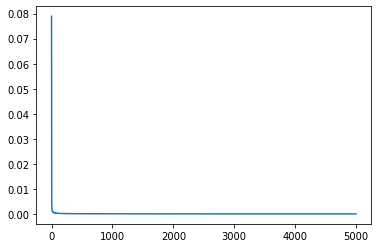

In [259]:
history = model.fit(X_train, train_y, epochs=5000)
model.save('./models/attempt4.h5')
plt.plot(history.history['loss'], label='train')

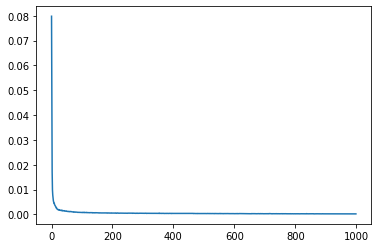

In [242]:
plt.plot(history.history['loss'], label='train')

In [69]:
opt = Adam(learning_rate=0.1)
original_model = Sequential()
original_model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activity_regularizer=regularizers.l2(0.03),
                       recurrent_regularizer=regularizers.l2(0.003), dropout=0.2))
original_model.add(Dense(50, activation="sigmoid", activity_regularizer=regularizers.l2(0.005)))
original_model.add(LSTM(20, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False, activity_regularizer=regularizers.l2(0.01),
                       recurrent_regularizer=regularizers.l2(0.001), dropout=0.2))
original_model.add(Dense(1, activation="relu", activity_regularizer=regularizers.l2(0.001)))
original_model.compile(loss='mse', optimizer=opt)
original_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 1, 50)             14200     
_________________________________________________________________
dense_15 (Dense)             (None, 1, 50)             2550      
_________________________________________________________________
lstm_14 (LSTM)               (None, 20)                5680      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 21        
Total params: 22,451
Trainable params: 22,451
Non-trainable params: 0
_________________________________________________________________


In [70]:
o_history = original_model.fit(X_train, train_y, epochs=1000)
original_model.save('./models/attempt2.h5')
plt.plot(o_history.history['loss'], label='train')

Epoch 1/1000
4065/4065 [==============================] - 2s 570us/step - loss: 1593.2251
Epoch 2/1000
4065/4065 [==============================] - 1s 208us/step - loss: 1486.9778
Epoch 3/1000
4065/4065 [==============================] - 1s 188us/step - loss: 1477.8330
Epoch 4/1000
4065/4065 [==============================] - 1s 164us/step - loss: 1448.0589
Epoch 5/1000
4065/4065 [==============================] - 0s 110us/step - loss: 1439.0314
Epoch 6/1000
4065/4065 [==============================] - 0s 106us/step - loss: 1412.6573
Epoch 7/1000
4065/4065 [==============================] - 0s 117us/step - loss: 1403.9538
Epoch 8/1000
4065/4065 [==============================] - 1s 149us/step - loss: 1393.9561
Epoch 9/1000
4065/4065 [==============================] - 1s 128us/step - loss: 1415.6332
Epoch 10/1000
4065/4065 [==============================] - 1s 239us/step - loss: 1374.1811
Epoch 11/1000
4065/4065 [==============================] - 1s 159us/step - loss: 1396.4767
Epoch 12

4065/4065 [==============================] - 1s 225us/step - loss: 1317.5595
Epoch 92/1000
4065/4065 [==============================] - 1s 203us/step - loss: 1410.6393
Epoch 93/1000
4065/4065 [==============================] - 1s 211us/step - loss: 1349.8237
Epoch 94/1000
4065/4065 [==============================] - 1s 203us/step - loss: 1349.6299
Epoch 95/1000
4065/4065 [==============================] - 1s 241us/step - loss: 1345.1440
Epoch 96/1000
4065/4065 [==============================] - 1s 229us/step - loss: 1344.0372
Epoch 97/1000
4065/4065 [==============================] - 1s 187us/step - loss: 1344.2608
Epoch 98/1000
4065/4065 [==============================] - 1s 187us/step - loss: 1380.4527
Epoch 99/1000
4065/4065 [==============================] - 1s 167us/step - loss: 1342.5528
Epoch 100/1000
4065/4065 [==============================] - 1s 137us/step - loss: 1340.4844
Epoch 101/1000
4065/4065 [==============================] - 1s 143us/step - loss: 1326.6153
Epoch 102/1

4065/4065 [==============================] - 1s 209us/step - loss: 1442.7155
Epoch 181/1000
4065/4065 [==============================] - 1s 162us/step - loss: 1459.8031
Epoch 182/1000
4065/4065 [==============================] - 1s 177us/step - loss: 1469.8777
Epoch 183/1000
4065/4065 [==============================] - 1s 190us/step - loss: 1475.9050
Epoch 184/1000
4065/4065 [==============================] - 1s 161us/step - loss: 1437.7149
Epoch 185/1000
4065/4065 [==============================] - 1s 173us/step - loss: 1398.0695
Epoch 186/1000
4065/4065 [==============================] - 1s 190us/step - loss: 1390.6653
Epoch 187/1000
4065/4065 [==============================] - 1s 160us/step - loss: 1424.2478
Epoch 188/1000
4065/4065 [==============================] - 1s 156us/step - loss: 1462.7631
Epoch 189/1000
4065/4065 [==============================] - 1s 170us/step - loss: 1438.7286
Epoch 190/1000
4065/4065 [==============================] - 1s 173us/step - loss: 1408.8548
Epo

KeyboardInterrupt: 

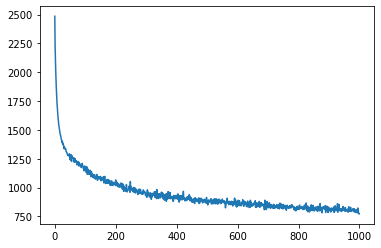

In [51]:
plt.plot(o_history.history['loss'], label='train')

In [ ]:
model.compile(optimizer = "adam", loss="mean_squared_error")
history = model.fit(X_train, train_y, epochs=5000)
model.save('./models/attempt1.h5')
plt.plot(history.history['loss'], label='train')

In [260]:
print("Testing model...")
#nnmodel.test_model(x_test, test_y[1:])
pred_ret = model.predict(X_test)
print('Making predictions...')
#pred_ret = nnmodel.predict_ret(x_test, y=None)

Testing model...
Making predictions...


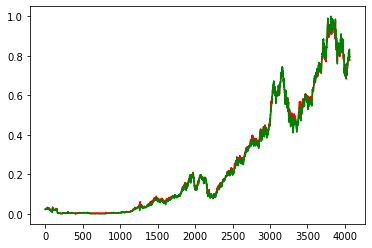

In [261]:
pred = model.predict(X_train)
plt.plot(pred, color='r')
plt.plot(train_y, color='g')

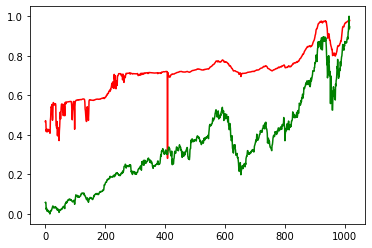

In [262]:
plt.plot(pred_ret, color='r')
plt.plot(np.array(test_y), color='g')
plt.show()

In [61]:
pred_ret.shape

(188627, 1)

In [263]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [264]:
import math
mse = mean_squared_error(np.array(test_y), pred_ret)
rmse = math.sqrt(mse)
mae = mean_absolute_error(np.array(test_y), pred_ret)
print("mse, rmse, mae:" + str((mse,rmse,mae)))

mse, rmse, mae:(0.14583185798404882, 0.3818793762224517, 0.3621920968427702)


In [265]:
pred_ret

array([[0.46664575],
       [0.47175744],
       [0.46041003],
       ...,
       [0.978754  ],
       [0.97869134],
       [0.9786773 ]], dtype=float32)